# Laporan Proyek Machine Learning - Muhammad Bagus Adi Prayoga

## Problem Domain

Susu sapi adalah komponen penting dalam rantai pangan manusia. Memastikan kualitas susu yang tinggi adalah suatu keharusan untuk memenuhi standar keamanan dan gizi yang diharapkan oleh konsumen. Standar kualitas yang ketat diterapkan dalam industri susu untuk memastikan produk yang dihasilkan memenuhi persyaratan yang ditetapkan.

Namun, kualitas susu dapat bervariasi dipengaruhi oleh sejumlah faktor, termasuk kesehatan sapi, kondisi lingkungan, dan proses produksi. Variabilitas ini dapat menyebabkan fluktuasi dalam kualitas susu, dan dalam beberapa kasus, produk mungkin tidak memenuhi standar yang diinginkan.

Pengklasifikasian kualitas susu sapi saat ini umumnya masih bergantung pada metode organoleptik (penilaian melalui indra manusia seperti bau, rasa, dan warna). Metode ini cenderung subjektif dan tidak konsisten, menyebabkan penilaian kualitas yang kurang akurat.

Penggunaan teknik analitik prediktif, seperti Machine Learning, dapat menjadi solusi untuk mengklasifikasikan kualitas susu sapi secara lebih objektif dan konsisten. Model Machine Learning dapat mengevaluasi parameter kimia susu, seperti pH, lemak, protein, dan laktosa, untuk menentukan kualitasnya. Pendekatan ini diharapkan dapat meningkatkan konsistensi dan akurasi dalam penilaian kualitas susu sapi, serta membantu dalam meningkatkan efisiensi proses evaluasi.

## Business Understanding

### Problem Statements

Berdasarkan pemahaman atas domain proyek yang telah diuraikan sebelumnya, berikut adalah problem statements yang teridentifikasi:
- Bagaimana langkah-langkah pre-processing data yang optimal dalam pengembangan model Machine Learning untuk melakukan klasifikasi kualitas susu sapi?
- Bagaimana kita dapat merancang dan mengembangkan model Machine Learning yang mampu mengklasifikasikan kualitas susu sapi secara efektif?
- Bagaimana cara yang tepat untuk mengevaluasi kinerja model Machine Learning yang telah dibangun dalam mengklasifikasikan kualitas susu sapi?

### Goals

Berdasarkan problem statements yang telah diidentifikasi sebelumnya, berikut adalah beberapa goals dari proyek ini:
- Mengembangkan alur pre-processing data yang efisien dan efektif untuk mempersiapkan data masukan bagi model Machine Learning guna klasifikasi kualitas susu sapi.
- Membangun model Machine Learning yang mampu mengklasifikasikan kualitas susu sapi dengan tingkat akurasi minimal 90% dan F1-score minimal 0.9.
- Melakukan evaluasi menyeluruh terhadap kinerja model Machine Learning yang telah dibangun untuk menentukan model terbaik yang memenuhi standar performa yang ditetapkan.

### Solution Statements

Berdasarkan goals di atas, maka diperoleh beberapa solution statement untuk menyelesaikan masalah tersebut, yaitu:
- Melakukan persiapan data untuk memastikan kesiapan dalam penggunaan dalam pembuatan model machine learning. Ini mencakup beberapa tahapan seperti penanganan missing value, outliers, feature engineering, pemisahan data, serta standarisasi.
- Mengembangkan model machine learning yang efektif dengan langkah-langkah berikut:
	- Membandingkan baseline model menggunakan library LazyPredict dan mengevaluasi kinerjanya.
	- Memilih tiga model machine learning dengan akurasi dan F1-score tertinggi dari hasil evaluasi.
	- Membangun model Voting Classifier yang menggabungkan tiga baseline model terbaik sebelumnya.
- Melakukan evaluasi terhadap setiap model menggunakan teknik cross validation, confusion matrix, serta berbagai metrics performance seperti akurasi, presisi, recall, dan F1-Score untuk menilai kinerja dan kemampuan prediktifnya secara menyeluruh.

## Data Understanding

### Initial Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip -q install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download cpluzshrijayan/milkquality
! unzip milkquality.zip

  0% 0.00/1.24k [00:00<?, ?B/s]
100% 1.24k/1.24k [00:00<00:00, 2.19MB/s]
Archive:  milkquality.zip
  inflating: milknew.csv             


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("milknew.csv")
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


#### Exploratory Data Analysis: Descriptive Statistics

In [5]:
# melihat bentuk data
df.shape

(1059, 8)

In [6]:
# informasi kolom dan datatype
df.columns, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


(Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
        'Grade'],
       dtype='object'),
 None)

In [7]:
# mengubah kolom ini menjadi kategorikal (karena hanya mengandung nilai 0 atau 1 saja)
df.rename(columns={'Fat ': 'Fat'}, inplace=True)
df.rename(columns={'Temprature': 'Temperature'}, inplace=True)

# for col in ["Taste", "Odor", "Fat", "Turbidity", "Grade"]:
for col in ["Grade"]:
    df[col] = df[col].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pH           1059 non-null   float64 
 1   Temperature  1059 non-null   int64   
 2   Taste        1059 non-null   int64   
 3   Odor         1059 non-null   int64   
 4   Fat          1059 non-null   int64   
 5   Turbidity    1059 non-null   int64   
 6   Colour       1059 non-null   int64   
 7   Grade        1059 non-null   category
dtypes: category(1), float64(1), int64(6)
memory usage: 59.2 KB


In [8]:
# mengecek null value
df.isna().sum()

pH             0
Temperature    0
Taste          0
Odor           0
Fat            0
Turbidity      0
Colour         0
Grade          0
dtype: int64

In [9]:
# statistik deskriptif
df.describe()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [10]:
df.describe(include=["category"])

,Grade
count,1059
unique,3
top,low
freq,429


Beberapa informasi yang dapat diambil dari descriptive statistics diatas adalah:
- Datasets ini terdiri dari 1,059 baris dan 8 kolom
- Tidak ada missing values pada datasets ini
- Ada indikasi outlier pada kolom pH dan Temperature
- Mayoritas sampel memiliki rasa "Baik", bau "Buruk", kandungan lemak "Tinggi", tingkat kekeruhan "Rendah", dan kualitas "Rendah".

#### Exploratory Data Analysis: Univariate Analysis

        count  percentage
low       429   40.509915
medium    374   35.316336
high      256   24.173749


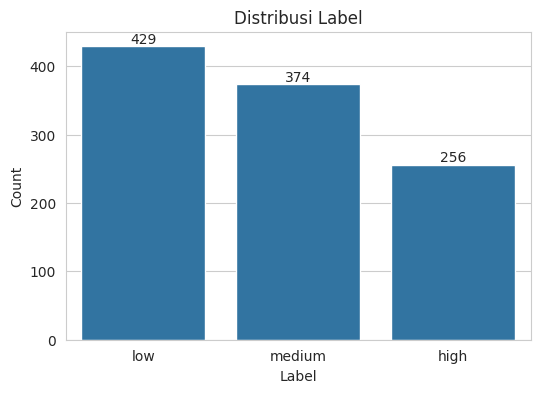

In [11]:
# melihat persentase label
count = df["Grade"].value_counts()
percentage = df["Grade"].value_counts(normalize=True) * 100
df_label = pd.DataFrame({'count': count, 'percentage': percentage})
print(df_label)

# countplot untuk melihat distribusi label
plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')
sns.countplot(x="Grade", data=df, order=["low", "medium", "high"])
plt.bar_label(plt.gca().containers[0])
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

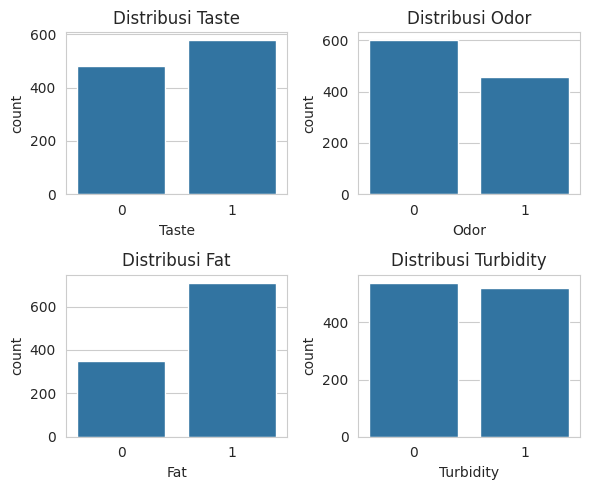

In [12]:
# countplot untuk melihat distribusi data fitur kategorikal
categorical_columns = ["Taste", "Odor", "Fat", "Turbidity"]

sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(6, 5))
for variable, subplot in zip(categorical_columns, ax.flatten()):
    subplot.set_title(f'Distribusi {variable}')
    sns.countplot(x=variable, data=df, ax=subplot)

plt.tight_layout()
plt.show()

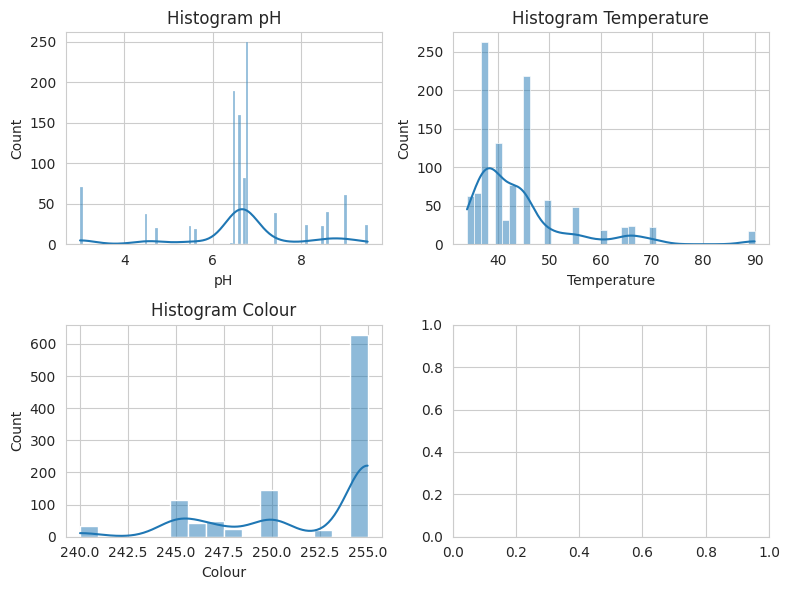

In [13]:
# histogram untuk melihat distribusi data fitur numerical
numerical_columns = ["pH", "Temperature", "Colour"]

sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
for variable, subplot in zip(numerical_columns, ax.flatten()):
    subplot.set_title(f'Histogram {variable}')
    sns.histplot(x=variable, data=df, ax=subplot, kde=True)

plt.tight_layout()
plt.show()

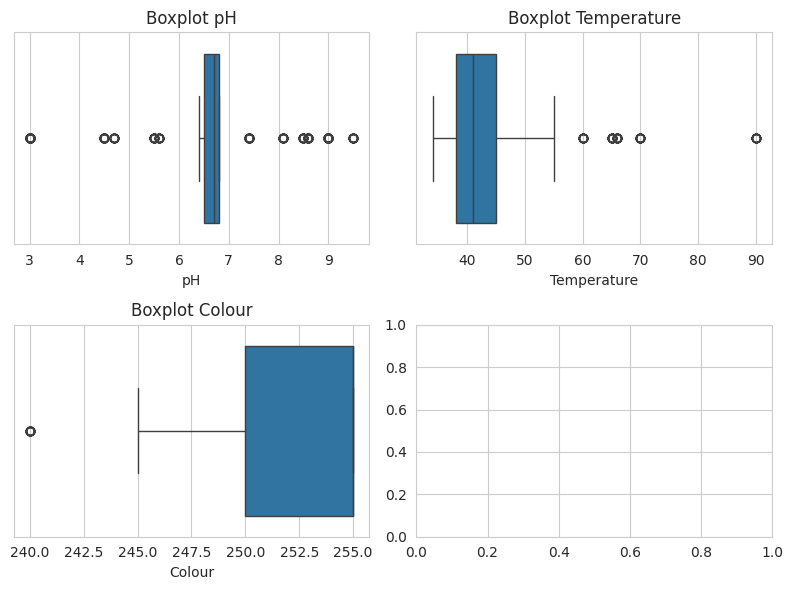

In [14]:
# boxlot untuk melihat outlier data fitur numerical
numerical_columns = ["pH", "Temperature", "Colour"]

sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
for variable, subplot in zip(numerical_columns, ax.flatten()):
    subplot.set_title(f'Boxplot {variable}')
    sns.boxplot(x=variable, data=df, ax=subplot)

plt.tight_layout()
plt.show()

Informasi yang didapatkan dari univariate analysis:
- Distribusi label yang tidak seimbang dapat menghasilkan model yang memprediksi "Low" lebih sering, meskipun kualitas susu sebenarnya "Medium" atau "High".
    - Salah satu solusi untuk hal ini jika dimungkinkan adalah dengan menggunakan teknik sampling seperti SMOTE
    - Menggunakan model klasifikasi yang dapat bekerja pada distribusi data yang tidak seimbang seperti Random Forest atau SVM
- Distribusi fitur kategorikal sudah cukup bagus, namun pada fitur Fat terdapar perbedaan jumlah yang sangat banyak
- Terdapat outlier pada semua fitur numerical, sehingga perlu dilakukan outlier handling

#### Exploratory Data Analysis: Multivariate Analysis

In [15]:
# encoding target label / Grade
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[["low", "medium", "high"]])
df[["Grade"]] = encoder.fit_transform(df[["Grade"]])
print(encoder.categories_)
df.head()

[array(['low', 'medium', 'high'], dtype=object)]


,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2.0
1,6.6,36,0,1,0,1,253,2.0
2,8.5,70,1,1,1,1,246,0.0
3,9.5,34,1,1,0,1,255,0.0
4,6.6,37,0,0,0,0,255,1.0


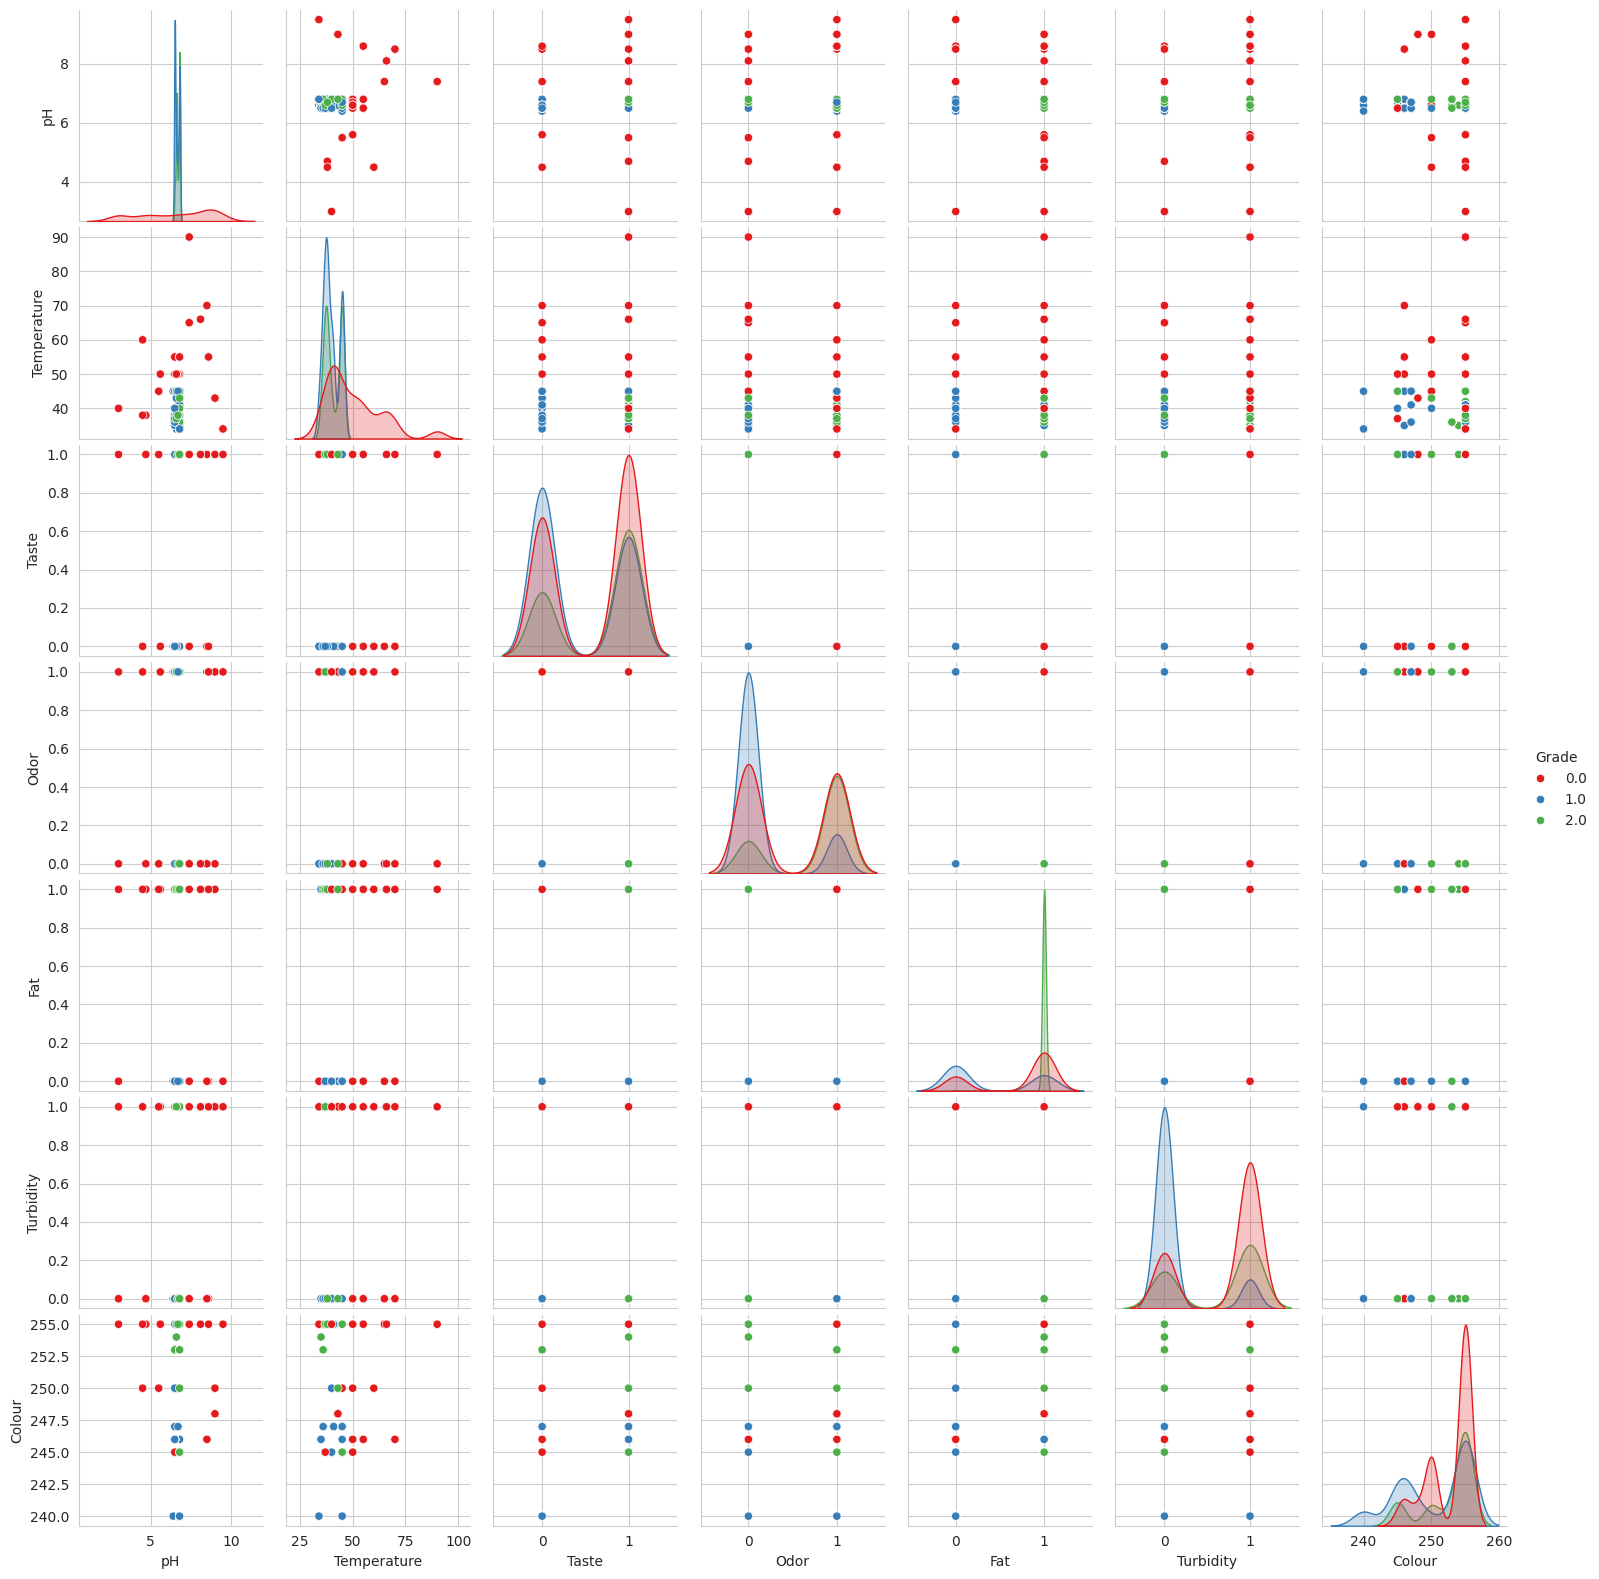

In [16]:
# melihat pairplot untuk melihat hubungan antar fitur
sns.pairplot(df, palette='Set1', diag_kind='kde', hue="Grade")
plt.gcf().set_size_inches(16, 16)
plt.show()

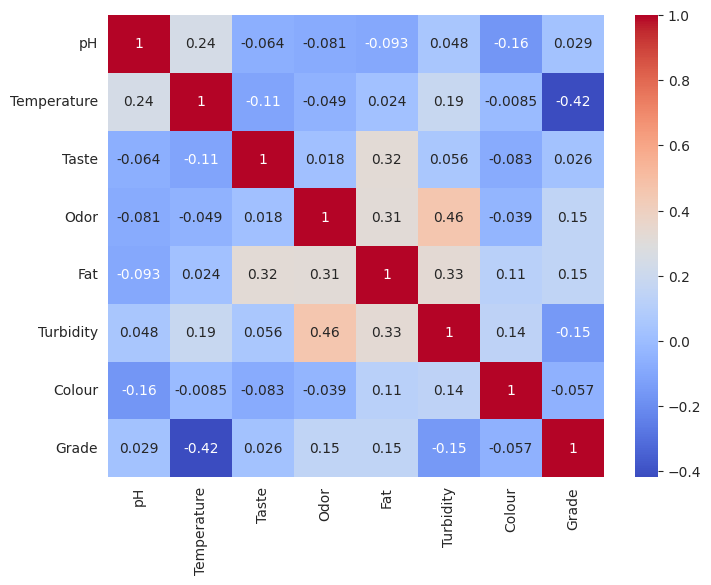

In [17]:
# melihat korelasi antar kolom
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Informasi yang didapatkan dari multivariate analysis:
- Kolom Grade memiliki korelasi positif yang kecil dengan kolom Odor dan Fat
- Kolom Grade memiliki korelasi negatif yang kecil dengan kolom Turbidity
- Kolom Grade memiliki korelasi negatif yang sedang dengan kolom Temperature

## Data Preparation

### Handling Outlier

In [18]:
# handling outlier menggunakan metode IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
outliers = df[(df < lower_fence) | (df > upper_fence)].count()

# melihat outlier
print("Total Data:", df.shape[0])
print("Total Outliers:", outliers.sum())
outliers

Total Data: 1059
Total Outliers: 514


pH             379
Temperature    103
Taste            0
Odor             0
Fat              0
Turbidity        0
Colour          32
Grade            0
dtype: int64

In [19]:
# exclude outlier
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [20]:
# melihat bentuk data setelah handling outlier
df.shape

(648, 8)

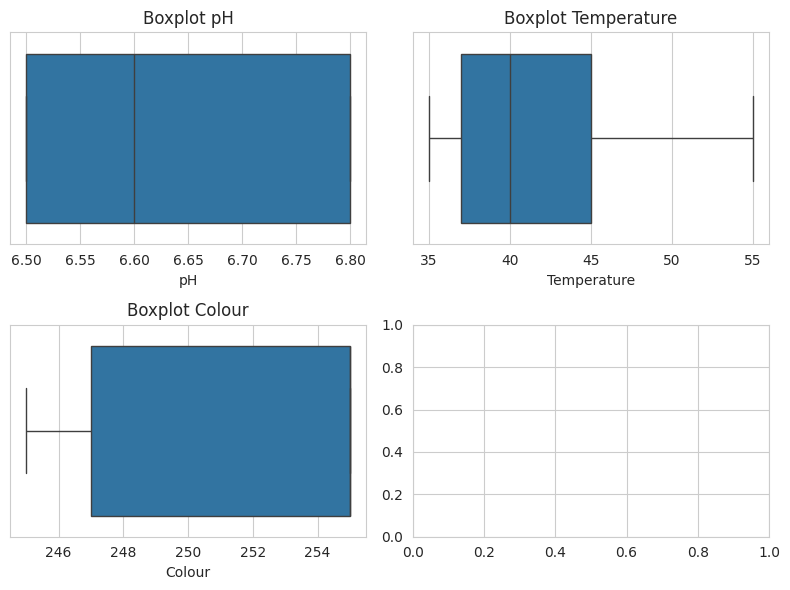

In [21]:
# boxlot fitur setelah outlier handling

sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
for variable, subplot in zip(numerical_columns, ax.flatten()):
    subplot.set_title(f'Boxplot {variable}')
    sns.boxplot(x=variable, data=df, ax=subplot)

plt.tight_layout()
plt.show()

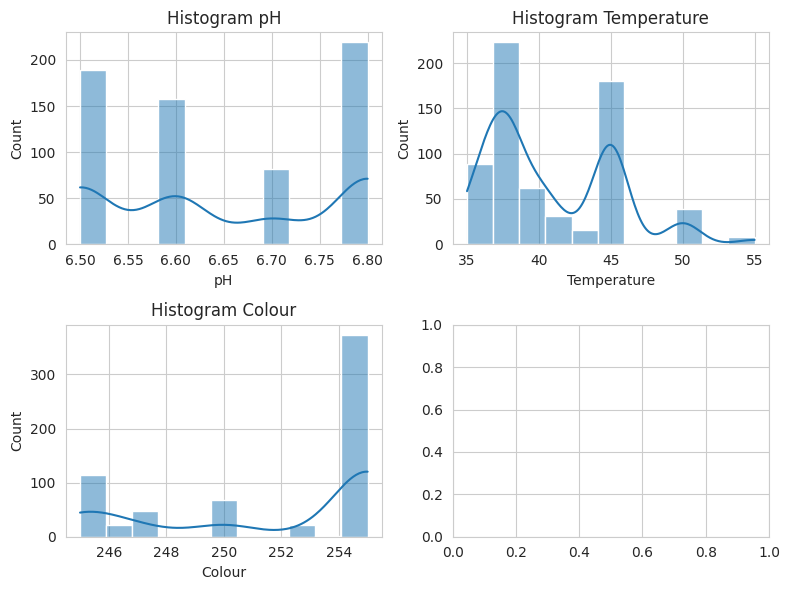

In [22]:
# distribusi data setelah outlier handling

sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
for variable, subplot in zip(numerical_columns, ax.flatten()):
    subplot.set_title(f'Histogram {variable}')
    sns.histplot(x=variable, data=df, ax=subplot, kde=True)

plt.tight_layout()
plt.show()

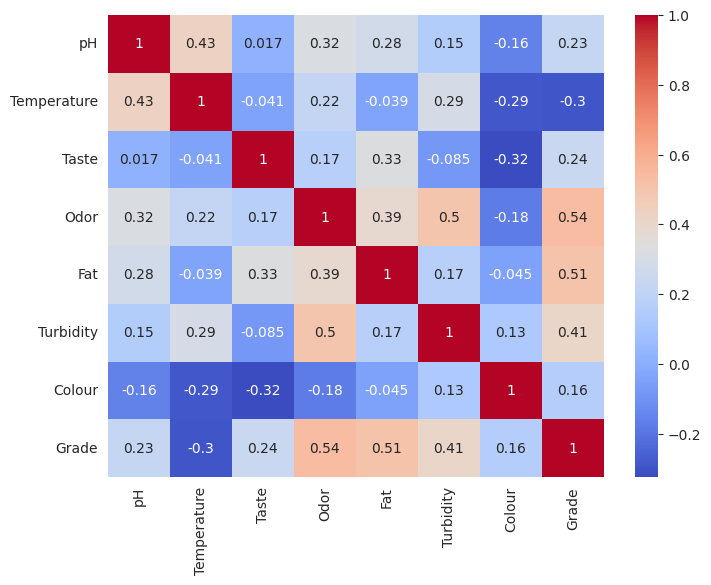

In [23]:
# melihat korelasi antar kolom setelah outlier handling
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Splitting Data

In [24]:
# memisahkan data menjadi fitur dan label
X = df.drop('Grade', axis=1)
y = df['Grade']

In [25]:
# Splitting the dataset into the Training set and Test set
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Standardization

In [26]:
# standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

col = X_train.columns

X_train[col] = sc.fit_transform(X_train[col])
X_test[col] = sc.transform(X_test[col])

In [27]:
# melihat data setelah standardize X_train
X_train.head()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
542,1.185886,0.896292,0.936382,1.271283,0.726652,-0.698932,-1.624555
49,-1.232575,-0.886826,-1.067940,-0.786607,-1.376174,-0.698932,0.781161
496,1.185886,-1.109715,-1.067940,1.271283,0.726652,-0.698932,0.300018
476,1.185886,0.896292,-1.067940,-0.786607,-1.376174,1.430755,0.781161
903,-1.232575,-0.663936,0.936382,-0.786607,-1.376174,-0.698932,0.781161


In [28]:
# melihat data setelah standardize X_test
X_test.head()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
1040,1.185886,0.896292,0.936382,1.271283,0.726652,-0.698932,-1.624555
373,0.379733,-0.663936,0.936382,-0.786607,0.726652,-0.698932,0.781161
972,1.185886,0.450513,0.936382,-0.786607,0.726652,-0.698932,-0.421697
702,-1.232575,-0.663936,0.936382,1.271283,0.726652,1.430755,0.781161
122,-0.426421,-0.663936,-1.067940,-0.786607,0.726652,-0.698932,0.781161


## Modeling

### Train Baseline Model

In [29]:
!pip -q install lazypredict

import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [00:02<00:00,  9.69it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 35
[LightGBM] [Info] Number of data points in the train set: 518, number of used features: 7
[LightGBM] [Info] Start training from score -2.561096
[LightGBM] [Info] Start training from score -0.629574
[LightGBM] [Info] Start training from score -0.941708
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

100%|██████████| 29/29 [00:02<00:00, 11.22it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,1.00,1.00,None,1.00,0.33
XGBClassifier,1.00,1.00,None,1.00,0.57
DecisionTreeClassifier,1.00,1.00,None,1.00,0.02
ExtraTreesClassifier,1.00,1.00,None,1.00,0.22
RandomForestClassifier,1.00,1.00,None,1.00,0.33
LabelPropagation,1.00,1.00,None,1.00,0.06
LabelSpreading,1.00,1.00,None,1.00,0.08
BaggingClassifier,1.00,1.00,None,1.00,0.07
ExtraTreeClassifier,0.99,0.99,None,0.99,0.04


Dari perbandingan performa LazyPredict diatas, maka dipilih tiga traditional ML model yaitu SVC, DecisionTreeClassifier, dan KNeighborsClassifier.

In [30]:
temp = models.to_markdown()
print(temp)

| Model                         |   Accuracy |   Balanced Accuracy | ROC AUC   |   F1 Score |   Time Taken |
|:------------------------------|-----------:|--------------------:|:----------|-----------:|-------------:|
| LGBMClassifier                |   1        |            1        |           |   1        |    0.329773  |
| XGBClassifier                 |   1        |            1        |           |   1        |    0.566812  |
| DecisionTreeClassifier        |   1        |            1        |           |   1        |    0.0214205 |
| ExtraTreesClassifier          |   1        |            1        |           |   1        |    0.218265  |
| RandomForestClassifier        |   1        |            1        |           |   1        |    0.332005  |
| LabelPropagation              |   1        |            1        |           |   1        |    0.0624967 |
| LabelSpreading                |   1        |            1        |           |   1        |    0.0844977 |
| BaggingClassifier

### Support Vector Classification (SVC)

In [31]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model = svc_model.fit(X_train, y_train)

# prediksi y
y_pred_svc_model = svc_model.predict(X_test)

# melihat hasil akurasinya
score_train_svc_model = svc_model.score(X_train, y_train)
score_test_svc_model = svc_model.score(X_test, y_test)
print("Score Train:", score_train_svc_model)
print("Score Test:", score_test_svc_model)

Score Train: 0.9961389961389961
Score Test: 0.9923076923076923


### Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier()
dtc_model = dtc_model.fit(X_train, y_train)

# prediksi y
y_pred_dtc_model = dtc_model.predict(X_test)

# melihat hasil akurasinya
score_train_dtc_model = dtc_model.score(X_train, y_train)
score_test_dtc_model = dtc_model.score(X_test, y_test)
print("Score Train:", score_train_dtc_model)
print("Score Test:", score_test_dtc_model)

Score Train: 1.0
Score Test: 1.0


### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model = knn_model.fit(X_train, y_train)

# prediksi y
y_pred_knn_model = knn_model.predict(X_test)

# melihat hasil akurasinya
score_train_knn_model = knn_model.score(X_train, y_train)
score_test_knn_model = knn_model.score(X_test, y_test)
print("Score Train:", score_train_knn_model)
print("Score Test:", score_test_knn_model)

Score Train: 0.9942084942084942
Score Test: 0.9923076923076923


### Ensemble Model (Voting Classifier)

In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn import metrics

# membuat base model voting
clf_list = [('SVC', svc_model), ('DecisionTreeClassifier', dtc_model), ('KNN', knn_model)]

# Melihat masing-masing akurasi dari berbagai model
for model_tuple in clf_list:
    model_temp = model_tuple[1]
    model_temp.fit(X_train, y_train)
    y_pred_temp = model_temp.predict(X_test)
    acc = metrics.accuracy_score(y_pred_temp, y_test)
    print(f"{model_tuple[0]}'s accuraccy : {acc:.2f}")

SVC's accuraccy : 0.99
DecisionTreeClassifier's accuraccy : 1.00
KNN's accuraccy : 0.99


In [35]:
voting_model = VotingClassifier(clf_list, voting='hard')
voting_model.fit(X_train, y_train)

y_pred_voting_model = voting_model.predict(X_test)

# melihat hasil akurasinya
score_train_voting_model = voting_model.score(X_train, y_train)
score_test_voting_model = voting_model.score(X_test, y_test)

print("Score Train:", score_train_voting_model)
print("Score Test:", score_test_voting_model)

Score Train: 0.9980694980694981
Score Test: 0.9923076923076923


Dari hasil ketiga model di atas, dapat dikatakan sudah sangat bagus karena perbedaan antara akurasi train dan test tidak berbeda jauh. Akan tetapi, masih ada indikasi overfit karena terlalu sempurna sehingga akan dicoba evaluasi cross validation nanti.

## Evaluation

In [36]:
# melakukan cross validation untuk mengecek overfitting
from sklearn.model_selection import cross_val_score

model_list = [('SVC', svc_model), ('DecisionTreeClassifier', dtc_model), ('KNN', knn_model), ('VotingClassifier', voting_model)]
val_result = []

for model in model_list:
    scores = cross_val_score(model[1], X_train, y_train, cv=10, scoring='accuracy')
    val_result.append(scores)
    print(f"{model[0]}: {scores.mean():.2f} (+/- {scores.std():.2f})")

SVC: 0.99 (+/- 0.01)
DecisionTreeClassifier: 0.99 (+/- 0.01)
KNN: 0.99 (+/- 0.02)
VotingClassifier: 0.99 (+/- 0.01)


In [37]:
# perbandingan akurasi dari berbagai model
acc = pd.DataFrame(
    {
        'Score Train': [score_train_svc_model, score_train_dtc_model, score_train_knn_model, score_train_voting_model],
        'Score Test': [score_test_svc_model, score_test_dtc_model, score_test_knn_model, score_test_voting_model]
    },
    index=['SVC', 'DecisionTree', 'KNN', 'Voting'])
acc['CV Mean'] = [val_result[0].mean(), val_result[1].mean(), val_result[2].mean(), val_result[3].mean()]
acc['CV Std'] = [val_result[0].std(), val_result[1].std(), val_result[2].std(), val_result[3].std()]
acc

,Score Train,Score Test,CV Mean,CV Std
SVC,1.00,0.99,0.99,0.01
DecisionTree,1.00,1.00,0.99,0.01
KNN,0.99,0.99,0.99,0.02
Voting,1.00,0.99,0.99,0.01


In [38]:
print(acc.to_markdown())

|              |   Score Train |   Score Test |   CV Mean |    CV Std |
|:-------------|--------------:|-------------:|----------:|----------:|
| SVC          |      0.996139 |     0.992308 |  0.990309 | 0.0129574 |
| DecisionTree |      1        |     1        |  0.99227  | 0.0127908 |
| KNN          |      0.994208 |     0.992308 |  0.986501 | 0.0150346 |
| Voting       |      0.998069 |     0.992308 |  0.992232 | 0.0128252 |


In [39]:
# melihat confusion matrix
cm_svc = metrics.confusion_matrix(y_test, y_pred_svc_model)
cm_dtc = metrics.confusion_matrix(y_test, y_pred_dtc_model)
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn_model)
cm_voting = metrics.confusion_matrix(y_test, y_pred_voting_model)

print("Confusion Matrix SVC:\n", cm_svc)
print("\nConfusion Matrix Decision Tree:\n", cm_dtc)
print("\nConfusion Matrix KNN:\n", cm_knn)
print("\nConfusion Matrix Voting:\n", cm_voting)

Confusion Matrix SVC:
 [[ 9  0  1]
 [ 0 66  0]
 [ 0  0 54]]

Confusion Matrix Decision Tree:
 [[10  0  0]
 [ 0 66  0]
 [ 0  0 54]]

Confusion Matrix KNN:
 [[ 9  0  1]
 [ 0 66  0]
 [ 0  0 54]]

Confusion Matrix Voting:
 [[ 9  0  1]
 [ 0 66  0]
 [ 0  0 54]]


In [40]:
# melihat classification report
cr_svc = metrics.classification_report(y_test, y_pred_svc_model)
cr_dtc = metrics.classification_report(y_test, y_pred_dtc_model)
cr_knn = metrics.classification_report(y_test, y_pred_knn_model)
cr_voting = metrics.classification_report(y_test, y_pred_voting_model)

In [41]:
print("Classification report SVC:")
print(cr_svc)

Classification report SVC:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       1.00      1.00      1.00        66
         2.0       0.98      1.00      0.99        54

    accuracy                           0.99       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.99      0.99      0.99       130



In [42]:
print("Classification report Decision Tree:")
print(cr_dtc)

Classification report Decision Tree:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        66
         2.0       1.00      1.00      1.00        54

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130



In [43]:
print("Classification report KNN:")
print(cr_knn)

Classification report KNN:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       1.00      1.00      1.00        66
         2.0       0.98      1.00      0.99        54

    accuracy                           0.99       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.99      0.99      0.99       130



In [44]:
print("Classification report Voting Classifier:")
print(cr_voting)

Classification report Voting Classifier:
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       1.00      1.00      1.00        66
         2.0       0.98      1.00      0.99        54

    accuracy                           0.99       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.99      0.99      0.99       130

